# Discourse Tutorial

Before beginning, make sure that NLTK, NumPy, and Matplotlib have been installed. Please see the [tutorial](https://veverica-hrdzava.github.io/discoursetutorial/) for directions on how to do this as well as an in-depth walkthrough of all the below steps.

# TextTiling

For `TextTiling` we will need to import `texttiling` from NLTK and `PyLab` from Matplotlib. For `WindowDiff`, we will need to import `segmentation` from NLTK.

In [1]:
from nltk.tokenize import texttiling
from matplotlib import pylab
from nltk.metrics import segmentation

Before running, text will have to be preprocessed to ensure it has paragraph breaks, or an error will result. The below function cleans up the text we will be using in this tutorial, removing excess newlines.

In [2]:
def preprocess(text):
    no_ex_lines = ''
    for i in range(len(text)):
        if i < len(text)-1:
            if text[i] == '\n' and ch1[i+1] == '\n':
                no_ex_lines += '@'
            elif ch1[i] == '\n' and ch1[i+1] != '\n':
                no_ex_lines += ' '
            else:
                no_ex_lines += ch1[i]
        else:
            no_ex_lines += ch1[i]

    preprocessed = ''
    for i in no_ex_lines:
        if i == '@':
            preprocessed += '\n\n'
        else:
            preprocessed += i
    return preprocessed

Adjust line 1 below so that it directs to the path of the .txt file on your computer. We will be looking at just the first chapter of this book and will preprocess it using the above function.

In [3]:
book  = open('/histeng.txt')
file = book.read()
book.close()

ch1 = file[950:22157]

In [4]:
text = preprocess(ch1)

Two `TextTiling` objects will be instantiated, one for each of the `demo_mode` parameter settings. We will print the output of the `tokenize()` function of the second instantiation, which will give us the segments of the document.

In [5]:
text_tile = texttiling.TextTilingTokenizer(w=30,k=5,demo_mode=True)
text_tile_chunk = texttiling.TextTilingTokenizer(w=30,k=5,demo_mode=False)

sections = text_tile_chunk.tokenize(text)

#Print sections
for i in range(len(sections)):
    print(i+1,':',sections[i],'\n')

1 : If you look at a Map of the World, you will see, in the left-hand upper corner of the Eastern Hemisphere, two Islands lying in the sea.  They are England and Scotland, and Ireland.  England and Scotland form the greater part of these Islands.  Ireland is the next in size.  The little neighbouring islands, which are so small upon the Map as to be mere dots, are chiefly little bits of Scotland,--broken off, I dare say, in the course of a great length of time, by the power of the restless water.

 In the old days, a long, long while ago, before Our Saviour was born on earth and lay asleep in a manger, these Islands were in the same place, and the stormy sea roared round them, just as it roars now.  But the sea was not alive, then, with great ships and brave sailors, sailing to and from all parts of the world.  It was very lonely.  The Islands lay solitary, in the great expanse of water.  The foaming waves dashed against their cliffs, and the bleak winds blew over their forests; but th

We will then look at a graphic representation of the gap scores for the pseudosentence breaks by calling `tokenize` on the first instantiation of `TextTile`.

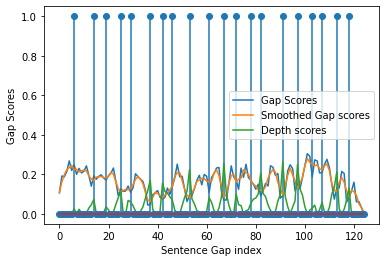

In [6]:
#Code below adapted from NLTK Demo
gap_scores, smoothed_g_scores, depth_scores, breaks = text_tile.tokenize(text)
pylab.xlabel("Sentence Gap index")
pylab.ylabel("Gap Scores")
pylab.plot(range(len(gap_scores)), gap_scores, label="Gap Scores")
pylab.plot(range(len(smoothed_g_scores)), smoothed_g_scores, label="Smoothed Gap scores")
pylab.plot(range(len(depth_scores)), depth_scores, label="Depth scores")
pylab.stem(range(len(breaks)), breaks,use_line_collection=True)
pylab.legend()
pylab.show()

We will then print out a list of all pseudosentence boundaries, with a value of `0` or `1`, corresponding to whether a topic boundary was assessed. We will also print a list of all instances of `1` with numbers that will correspond to the pseudosentences, which we will print below.

In [7]:
print(breaks)

pseudo_breaks = []
for i in range(len(breaks)):
    if breaks[i] == 1:
        pseudo_breaks.append(i+1)
print(pseudo_breaks)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[7, 15, 20, 26, 30, 38, 43, 47, 54, 62, 68, 73, 79, 83, 92, 98, 104, 108, 114, 119]


# WindowDiff

Before starting with `WindowDiff`, we will print the pseudosentences, so that we are able to compare the determination of the `TextTiling` with human segmentation judgements.

In [8]:
seqs = text_tile_chunk._divide_to_tokensequences(text)

count = 1
for i in seqs:
    print('Pseudosentence #:',count)
    sequence = ''
    for i in i.__dict__['wrdindex_list']:
        sequence += i[0]+' '
    print(sequence)
    count += 1

Pseudosentence #: 1
If you look at a Map of the World you will see in the left hand upper corner of the Eastern Hemisphere two Islands lying in the sea They are 
Pseudosentence #: 2
England and Scotland and Ireland England and Scotland form the greater part of these Islands Ireland is the next in size The little neighbouring islands which are so small upon 
Pseudosentence #: 3
the Map as to be mere dots are chiefly little bits of Scotland broken off I dare say in the course of a great length of time by the power 
Pseudosentence #: 4
of the restless water In the old days a long long while ago before Our Saviour was born on earth and lay asleep in a manger these Islands were in 
Pseudosentence #: 5
the same place and the stormy sea roared round them just as it roars now But the sea was not alive then with great ships and brave sailors sailing to 
Pseudosentence #: 6
and from all parts of the world It was very lonely The Islands lay solitary in the great expanse of water The foaming waves

We will then need both the pseudosentence boundaries which we produced above (`breaks`) and a hypothetical human segmentation to compare.

In [9]:
text_tiling_segs = breaks
human_segs = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

We will need to convert these lists to strings to use `WindowDiff`.

In [10]:
tt_string = ''
h_string = ''
for i in text_tiling_segs:
    tt_string += str(i)
for i in human_segs:
    h_string += str(i)

print(tt_string)
print(h_string)

00000010000000100001000001000100000001000010001000000100000001000001000010000010001000000001000001000001000100000100001000000
00010000000000100001000001000100000001000000001000000100000001001001010010000010001000000001000001000001000100000100001000000


Once these are have been converted, `WindowDiff` can be run using just one line of code.

In [11]:
segmentation.windowdiff(tt_string,h_string,3)

0.12195121951219512